La page ci-présente existe en version notebook téléchargeable grâce au bouton ![Bouton](./images/bouton_tl.png) (choisir le format `.ipynb`). On rappelle qu'l faut ensuite l'enregistrer dans un répertoire adéquat sur votre ordinateur (`tp1` par exemple dans votre répertoire personnel) puis lancer Jupyter Notebook depuis Anaconda pour accéder au notebook, le modifier et exécutez les cellules de code adéquates.

# (TP) Application au tracé graphique (1h)

## Analyse de la relation durée-distance

### Votre travail
Vous aller devoir exploiter non plus une mesure de temps de vol pour une distance émetteur-récepteur mais regrouper l'ensemble de résultats de mesure
des groupes de TP pour affiner votre mesure de la célérité.

Pour pouvoir tester votre code, des données expérimentales __fictives__ sont entrées dans la cellule suivante.
En TP, vous récupérerez l'ensemble des données de mesure des différents binômes et modifierez ces listes.

In [8]:
import numpy as np  # Pensez à l'alias de la bibliothèques numpy pour la suite.
import matplotlib.pyplot as plt
import numpy.random as rd
"""Données expérimentales

Pensez à entre les 4 listes dans le même ordre.
"""
d = np.array([10, 15, 17, 20, 25, 30, 35, 37, 40, 55])  # Liste des distances E-R (en cm - évitez les nombres trop petits)
ud = np.array([0.172, 0.82, 0.082, 0.14, 0.204, 0.17, 0.082, 0.16, 0.12, 0.81])  # Liste des incertitudes sur d
dt = np.array([0.27, 0.45, 0.47, 0.548, 0.705, 0.74, 1.03, 1.098, 1.14, 1.584])  # Liste des temps de vol (en ms)
udt = np.array([0.0245, 0.039, 0.057, 0.028, 0.0506, 0.037, 0.041, 0.05, 0.027, 0.031])  # Liste des incertitudes sur Delta t

print(len(d), len(ud), len(dt), len(udt))

10 10 10 10


### C'est à vous.

#### Codage
C'est à vous de coder maintenant la cellule suivante est entièrement à votre disposition. Vous devez obtenir en sortie
le graphique représentant $\Delta t$ en fonction $d$.

Pensez bien :
* aux légendes du graphiques
* aux barres d'incertitudes

_On rappelle que les vecteurs contenant les données ont déjà été créé dans la première cellule : `d, ud, dt, udt`. Pensez à utiliser le [modèle](https://pcsi3physiquestan.github.io/intro_python/notebook/plt_presentation.html#un-exemple-basique)._

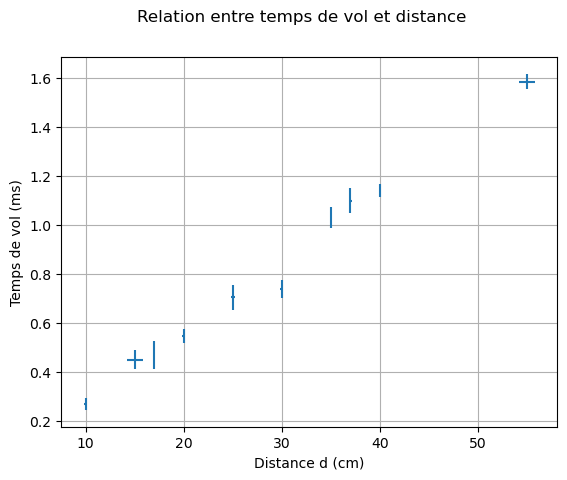

In [9]:
"""Votre code

A vous de coder le graphique à tracer.
"""
# Créer la fenêtre graphique avec subplots
f, ax = plt.subplots()
# Donner un titre (f.suptitle) et des légendes (ax.set_xlabel et ax.set_ylabel)
f.suptitle("Relation entre temps de vol et distance")
ax.set_xlabel("Distance d (cm)")
ax.set_ylabel("Temps de vol (ms)")

# Tracer la courbe Delta t (D) avec errorbar
ax.errorbar(d, dt, xerr=ud, yerr=udt, linestyle='')

# Afficher une grille (ax.grid) et afficher le graphique (plt.show)
ax.grid()
plt.show()

#### Première analyse des données.
Lorsque vous aurez obtenu le graphique des données expérimentales réelles, analysez le :

* Que cherche-t-on à observer ?
* Observe-t-on ce qu'on attend ?
* Si oui, tant mieux, sinon essayez de comprendre où sont les problèmes.

Ecrire alors le compte-rendu de votre analyse.

## (TP) Détermination des valeurs de la célérité

Quand on est face à une série de mesures, il y a deux analyses à réaliser en général:
* déterminer une mesure basées sur la série. On peut utiliser plusieurs méthodes mais on va ici simplement utiliser un calcul de moyenne des valeurs. On peut alors estimer l'incertitude de mesure comme étant l'incertitude sur la moyenne d'un échantillon.
* Vérifier (au moins _a posteriori_) que les mesures sont cohérentes entre elles (plus simplement ici avec la moyennes estimées).

### Estimation de la célérité.
Cette partie va nous amener:
1. à estimer la célérité pour chaque couple de mesure. 
2. à réaliser ensuite la moyenne des mesures. 
3. à estimer l'incertitude comme pour un étude statistique (Type A):

$$
u(c_{moy}) = \frac{\sigma(echantillon)}{\sqrt{nombre_echantillons}}
$$
où $sigma$ est l'écart-type statistique calculé sur la série de mesures (réelles ici et non simulées !).

Détecter et modifier les lignes lorsque c'est nécessaire.

In [10]:
"""
Estimation des celerites pour chaque mesures
"""
c_ms = d / dt * 10 # d et dt sont des vecteurs numpy : pensez à utiliser la vectorialisation. Le *10 est pour passer en m/s

"""
Calculer la célérité moyenne.
Utiliser la fonction np.mean(vecteur:ndarray) -> float pour calculer une moyenne en une seule ligne.
"""
c_mean = np.mean(c_ms)

"""
Calculer l'incertitude sur c_mean en utilisant la relation donnée.
On rappelle quie l'écart-type se calcule avec la fonction numpy.std(echantillon: ndarray, ddof=1) -> float
"""
c_u = np.std(c_ms, ddof=1) / np.sqrt(len(c_ms))

print("c = {} +/- {} m/s".format(c_mean, c_u))

c = 356.52662305266074 +/- 6.667201021099089 m/s


__Rendre compte de la valeur estimée en n'oubliant pas l'unité et la réflexion sur les chiffres significatifs.__

### Test de cohérence des données.
Pour tester la cohérence des données, on va tester la cohérence entre la mesure de $c$ pour chaque échantillon et la moyenne précédente. On connait déjà une méthode pour le faire : un calcul d'écart normalisé. Ainsi, on pourra, si nécessaire écarter ou au moins commenter une mesure qui semblerait incohérente.

On possède déjà les mesures des célérités `c_ms`, la célérité moyenne `c_mean` et son incertitude `c_u`, il manque l'incertitude sur mesure unique de célérité. On va reprendre la même méthode que pour la mesure unique de la partie précédente, mais pour gagner du temps, on part directement de $d, u(d), \Delta t, u(\Delta t)$ donnée et on va __utiliser des distributions uniformes.__ Donc:
1. On boucle sur le nombre d'échantillons:
    1. On simule N valeurs de $d$ et $\Delta t$ pour le j-ième échantillon et on en déduit N valeurs de c puis son incertitude. (Utiliser la méthode 3 qui est beaucoup plus rapide).
    2. On stocke l'incertitude obtenue dans une liste `c_us` qu'on aura préalablement initialisée.
    3. On calculer l'écart-normalisé entre le j-ième échantillon et la moyenne qu'on stocke dans une liste `en_s`
2. On représente les valeurs des écarts normalisés sur un graphique qu'on analuse ensuite.

[1.9901008952733734, 3.334034669583997, 0.7248131289939974, 1.2488418465536861, 0.2806009689102407, 7.218882803512386, 2.4907004520106417, 2.9064487879831455, 0.8451169110961082, 1.3917864578272603]


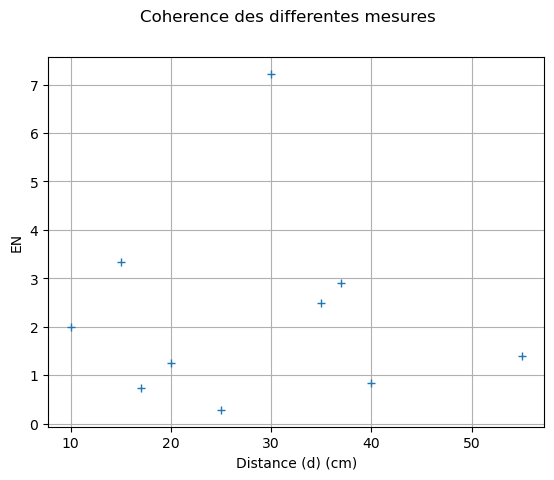

In [17]:
"""
A vous de compléter la boucle en vous aidant de ce qui a été fait pour une mesure unique.
"""

c_us = []
en_s = []
k = len(d)  # Nombre d'échantillons
N = 100000  # Nombre de simulations
for j in range(k): # j  sera le numéro de l'échantillon
    """ Simuler les valeurs de d et dt puis estimer c et l'incertitude"""
    dj_sim = d[j] + rd.uniform(-ud[j], ud[j], N)
    dtj_sim = dt[j] + rd.uniform(-udt[j], udt[j], N)

    c_sim = dj_sim / dtj_sim

    c_uj = np.std(c_sim, ddof=1)
    c_us.append(c_uj)
    """Calculer l ecart normalise a la moyenne"""
    en_j = np.abs(c_ms[j] - c_mean) / np.sqrt(c_u ** 2 + c_uj ** 2)
    en_s.append(en_j)

print(en_s)  # Pour vérifier ce qu'il y a dedans

"""Tracé eds écart normalisés"""
f, ax = plt.subplots()
f.suptitle("Coherence des differentes mesures")
ax.set_xlabel("Distance (d) (cm)")
ax.set_ylabel("EN")

ax.plot(d, en_s, marker="+", linestyle="")  # On ne relit pas les points

ax.grid()
plt.show()

### Analyse des données
Réalisez une analyse des valeurs obtenues pour chaque groupe puis de la célérité moyenne en comparaison avec la valeur donnée dans la littérature.

__Avec l'exemple des données, on observe ici plusieurs données en contradiction avec l'ensemble des données. En pratique, il faudrait refaire les mesure ou au moins ne sélection que les données les plus pertinentes.__

### Bonus : Carte de controle
On pourrait, au lieu de tracer les ecarts normalisés, tracer une carte de controle qu représente les barres d'incertitudes et la moyenne (avec son incertitudes). Cette méthode est plus visuelle mais attention car les impressions ne correspondent pas tout à fait à ce que donne les EN (cf. TP).

10


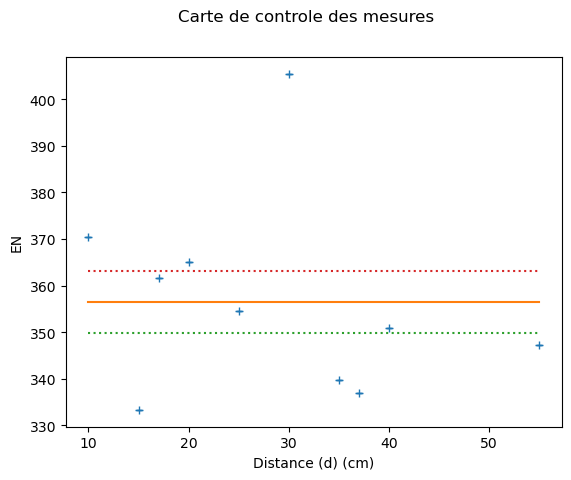

In [12]:
f, ax = plt.subplots()
f.suptitle("Carte de controle des mesures")
ax.set_xlabel("Distance (d) (cm)")
ax.set_ylabel("EN")

# capsize sert à ajouter des barres aux extrémités simplement par esthétisime.
ax.errorbar(d, c_ms, marker="+", linestyle="", yerr=c_us, capsize=2)  # On ne relit pas les points

print(len([c_mean - c_u] * len(d)))
ax.plot(d, [c_mean] * len(d))  # Tracé de la moyenne
ax.plot(d, [c_mean - c_u] * len(d), linestyle=":")  # Valeur basse de l'intervalle associée à l'incertitude sur c_mean
ax.plot(d, [c_mean + c_u] * len(d), linestyle=":")  # Valeur haute de l'intervalle associée à l'incertitude sur c_mean


plt.show()